# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# Import the style from Matplotlib.
from matplotlib import style

# File to Load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
ride_count_bytype=pyber_data_df.groupby("type").count()["ride_id"]
ride_count_bytype.rename("Total Rides")

type
Rural        125
Suburban     625
Urban       1625
Name: Total Rides, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
driver_sum_bytype=city_data_df.groupby("type").sum()['driver_count']
driver_sum_bytype.rename("Total Drivers")

type
Rural         78
Suburban     490
Urban       2405
Name: Total Drivers, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
total_fare_bytype=pyber_data_df.groupby("type").sum()["fare"].round(2)
total_fare_bytype.rename("Total Fares")

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Total Fares, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
avg_fare_bytype=pyber_data_df.groupby("type").mean()["fare"]
avg_fare_bytype.rename("Average Fare per Ride")


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: Average Fare per Ride, dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
a=total_fare_bytype/driver_sum_bytype
avg_fare_per_driver=a.to_frame(name="avg_fare_per_driver")
avg_fare_per_driver

,avg_fare_per_driver
type,
Rural,55.486282
Suburban,39.502714
Urban,16.571468


In [28]:
#  6. Create a PyBer summary DataFrame. 

# Combine the data into a single dataset
pyber_summary_df = pd.merge(pd.merge(pd.merge(pd.merge(ride_count_bytype,
                              driver_sum_bytype,on="type"),
                            total_fare_bytype,on="type"),
                            avg_fare_bytype,on="type"),
                              avg_fare_per_driver,on="type")

#Renaming the columns
pyber_summary_df=pyber_summary_df.rename(columns=
                                           {"ride_id":"Total Rides",
                                            "driver_count":"Total Drivers",
                                            "fare_x":"Total Fares",
                                            "fare_y":"Average Fare per Ride",
                                            "avg_fare_per_driver":"Average Fare per Driver"
                                           })

# Display the data table for preview
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [29]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [47]:
#  8. Format the columns.
#pd.options.display.float_format = '${:,.2f}'.format
#pd.options.display.int_format = '{:,}'.format


pyber_summary_df.style.format({"Total Rides": "{:,}", 
                               "Total Drivers": "{:,}",
                               "Total Fares": '${:,.2f}',
                               "Average Fare per Ride": '${:,.2f}',
                               "Average Fare per Driver":'${:,.2f}' 
                              })


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [31]:
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [32]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [33]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_sum_bydate=pyber_data_df.groupby(['date','type']).sum()['fare']
fare_sum_bydate

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [34]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_sum_bydate = fare_sum_bydate.reset_index()
fare_sum_bydate

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [35]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_sum_bydate=fare_sum_bydate.pivot(index='date',columns='type',values='fare')

In [36]:
fare_sum_bydate.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [37]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

dated_fare_sum = fare_sum_bydate.loc['2019-01-01':'2019-04-29']
dated_fare_sum.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [38]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
dated_fare_sum.index = pd.to_datetime(dated_fare_sum.index)

In [39]:
# 7. Check that the datatype for the index is datetime using df.info()
dated_fare_sum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [40]:
resampled_df=dated_fare_sum.resample('W').sum()

In [41]:
resampled_df.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20
2019-03-10,303.94,925.27,2470.93
2019-03-17,163.39,906.20,2044.42
2019-03-24,189.76,1122.20,2368.37
2019-03-31,199.42,1045.06,1942.77
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80


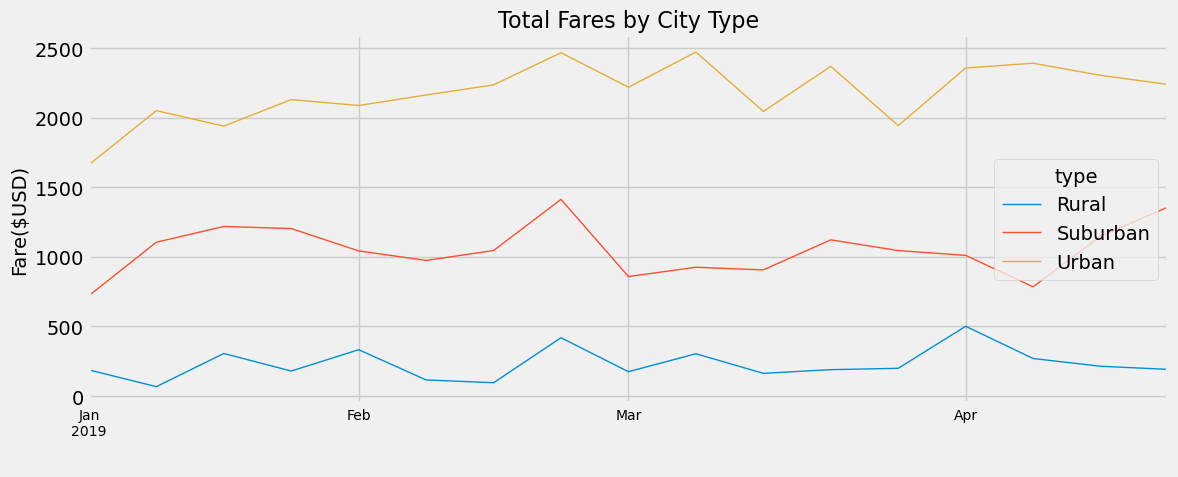

In [50]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fig,ax=plt.subplots(figsize=(12, 5))
resampled_df.plot(kind='line',ax=ax, linewidth=1)
fig.subplots_adjust(right=3)
ax.set_title('Total Fares by City Type',fontsize=16)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_xlabel(" ")
fig.tight_layout()
fig.savefig('Analysis/image11.png',bbox_inches='tight',dpi=400)
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

